In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

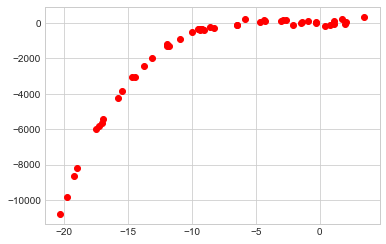

In [2]:
plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.85)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

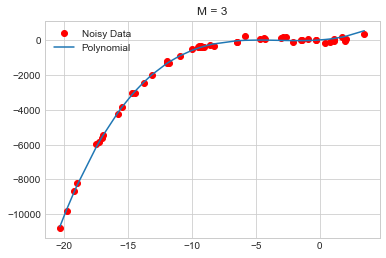

In [3]:
x = x.flatten()
y = y.flatten()
x1=np.sort(x)
y1=np.sort(y)
poly=np.poly1d(np.polyfit(x1, y1, 3))
plt.plot(x,y,'ro',label = 'Noisy Data')
plt.plot(x1, poly(x1),label = 'Polynomial')
plt.legend()
plt.title('M = 3')
plt.show()


In [4]:
def fittest_indvl(population): 
    Genes = []
        
    for i in range(len(population)): 
        indvl = population[i]
        temp = 0 
            
        for i in range(len(x)): 
            y_pred = indvl[0]*(x[i]**3) + indvl[1]*(x[i]**2) + indvl[2]*(x[i])+ indvl[3]
            y_true = y[i]
            temp += (y_pred - y_true)**2
        scores = (indvl, round(temp))
        Genes.append(scores)
            
    Genes = sorted(Genes, key = lambda i: float(i[1]), reverse = False)[:10]
    return Genes 

In [5]:
def Genetic_Algorithm(): 

    num_g = 500
    population = []
    for i in range(100): 
        population.append([random.randint(-50,50) for i in range(4)])

    for i in range(num_g): 
        n_population = []
        
        Genes = fittest_indvl(population)
        
        Parents = []
        for r in range(0, len(Genes)-1,2): 
            P1 = []
            P2 = []
            p1 = Genes[r][0]
            p2 = Genes[r+1][0]
            rand_idx = random.randrange(len(p1))
            P1 = p1[:rand_idx]+ p2[rand_idx:]
            P2 = p2[:rand_idx] + p1[rand_idx:]

            Parents.append(P1)
            Parents.append(P2)

        for a in range(len(Parents)): 
            b = Parents[a]
            mutation = []
            mutation.append(b)
            
            for s in range(9): 
                check = copy.deepcopy(b)
                idx = random.randrange(len(check))
                num = check[rand_idx]
                f = random.uniform(0.0,2.0)
                new_num = num * f
                check[idx] = new_num
                mutation.append(check)
            
            for j in mutation: 
                n_population.append(j)
             
        population = copy.deepcopy(n_population)

    return population 

In [6]:
bestFit = Genetic_Algorithm()
new_coefficients = fittest_indvl(bestFit)[0][0]
new_coefficients

[2.0099366293620498,
 15.283310365890715,
 6.102823296599106,
 0.0026299339738635736]

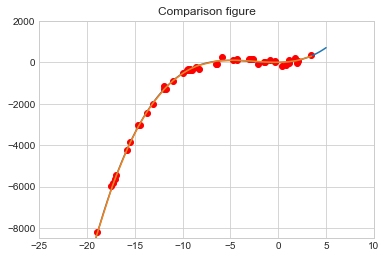

In [8]:
fit = np.poly1d(np.polyfit(x, y, 3))
t = np.linspace(-20, 5, 200)
plt.plot(x, y, 'ro')
plt.plot(t, fit(t), '-', label = 'polynomial line')

poly = np.poly1d(new_coefficients)
x1 = np.sort(x) 
plt.plot(x1, poly(x1), label = 'GA generated line') 

plt.xlim(-25, 10)
plt.ylim(-8500, 2000)
plt.title("Comparison figure" )
plt.show()


### After running the code several times, I have observed that sometimes the lines converge while sometimes they do not converge. It primarily depends on the population given at the begining for the Genetic algorithm. We can observe some randomness in the results obtained. The polynomial line still seems to be the best fit line every time we run the code. 